<h1> House Prices - 4</h1>
<h1>Eduardo Alves de Olivera <t/>TIA: 71956212</h1>

In [1]:
#imports
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
#lendo o dataset
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Separando as colunas numéricas
columns = [o for o in df.describe().columns]
print(columns)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [4]:
# Removendo os dados inválidos
df = df.fillna(df.mean())
df = df[columns]
df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna()
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#Separando os dados para o modelo
df['SalePrice'] = np.log(df['SalePrice'])
X = df.drop(['SalePrice','Id'], 1)
y = df['SalePrice']

[]

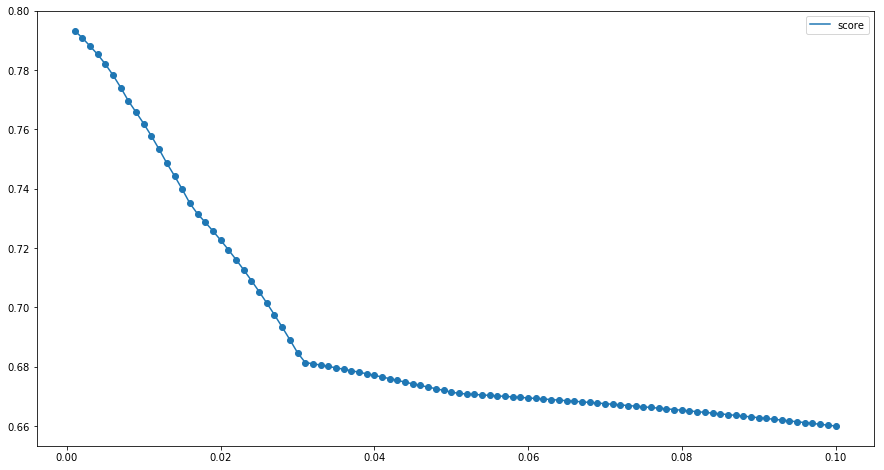

In [6]:
# Aplicando o Ridge variando o alpha
_alphas = [100, 115, 150, 182, 125, 131, 135, 155, 196, 205, 230, 275, 286, 305, 329, 345, 360, 379, 400]
train_error = []
train_score = []
l1 = []

for i in range(100):
    l1.append((i+1)/1000)
    elastic = ElasticNetCV(alphas=_alphas, l1_ratio=(i+1)/1000, cv=5, random_state=0).fit(X, y)
    train_score.append(elastic.score(X, y))
    train_error.append(sqrt(mean_squared_error(y, elastic.predict(X))))
    
# Exibindo os resultados de score
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.plot(l1, train_score, label='score')
plt.plot(l1, train_score, 'C0o')
plt.legend()
plt.plot()

[]

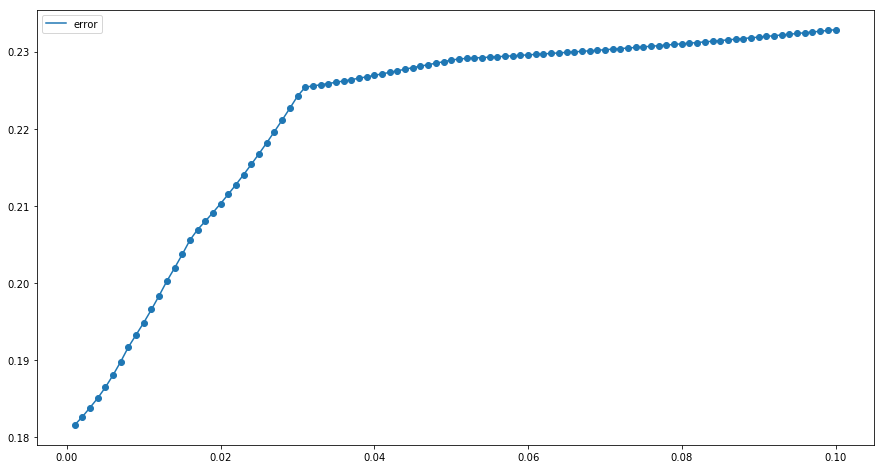

In [7]:
plt.plot(l1, train_error, label='error')
plt.plot(l1, train_error, 'C0o')
plt.legend()
plt.plot()

In [8]:
#Resultado Final
elastic = ElasticNetCV(alphas=_alphas, l1_ratio=0.001, cv=5, random_state=0).fit(X, y)
print(f"SCORE: {elastic.score(X, y)}, RMSE: {sqrt(mean_squared_error(y, elastic.predict(X)))}")

SCORE: 0.7932139611619096, RMSE: 0.18158345775684437


<h1>Segunda Parte</h1>

[]

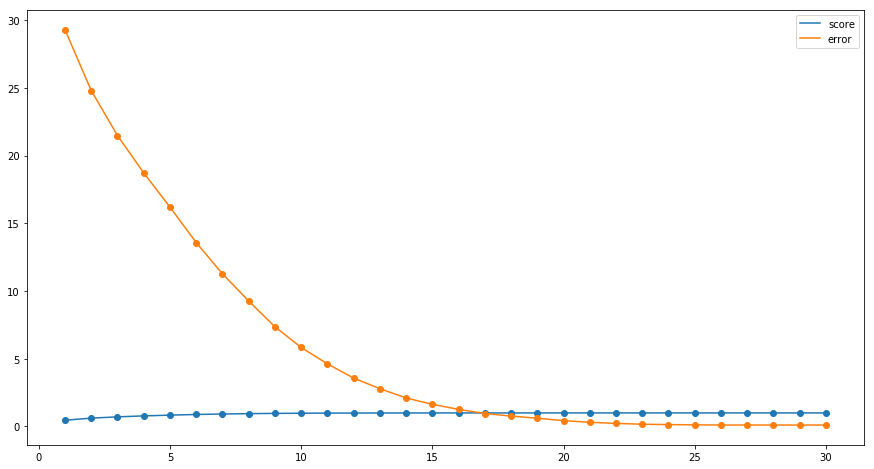

In [9]:
#Decision Tree Regressor

#max_depth
train_error = []
train_score = []
l1 = []
a=0
for i in range(30):
    a = i+1
    l1.append(a)
    regressor = DecisionTreeRegressor(random_state=0, max_depth=a).fit(X,y)
    train_score.append(regressor.score(X, y))
    train_error.append(sqrt(mean_squared_error(y, regressor.predict(X)))*100)

plt.plot(l1, train_score, label='score')
plt.plot(l1, train_score, 'C0o')
plt.plot(l1, train_error, label='error')
plt.plot(l1, train_error, 'C1o')
plt.legend()
plt.plot()
#print(f"SCORE: {regressor.score(X, y)}, RMSE: {sqrt(mean_squared_error(y, regressor.predict(X)))}")

In [10]:
regressor = DecisionTreeRegressor(random_state=0, max_depth=10).fit(X,y)
cross_val_score(regressor, X, y, cv=5)

array([0.72915064, 0.70926728, 0.76396392, 0.73309553, 0.73008236])

[]

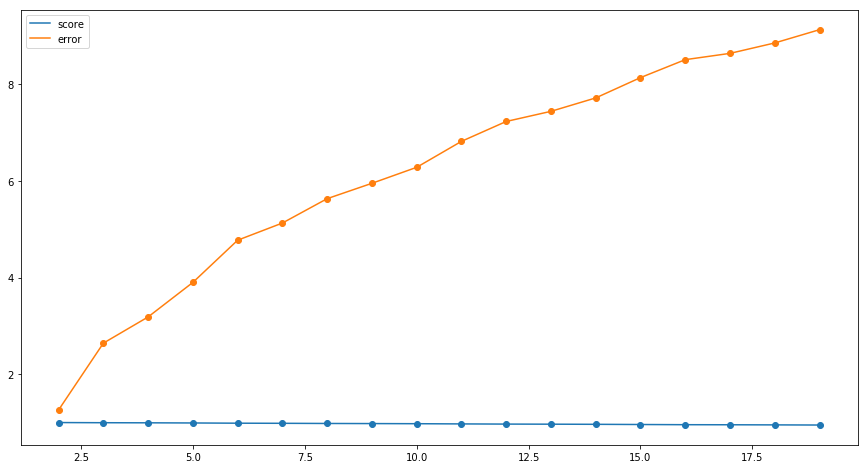

In [11]:
#min_samples_split
train_error = []
train_score = []
l1 = []
a=0
for i in range(2,20):
    a = i
    l1.append(a)
    regressor = DecisionTreeRegressor(random_state=0, max_depth=16, min_samples_split = a, min_samples_leaf = 1, max_features = 'auto').fit(X,y)
    train_score.append(regressor.score(X, y))
    train_error.append(sqrt(mean_squared_error(y, regressor.predict(X)))*100)

plt.plot(l1, train_score, label='score')
plt.plot(l1, train_score, 'C0o')
plt.plot(l1, train_error, label='error')
plt.plot(l1, train_error, 'C1o')
plt.legend()
plt.plot()

[]

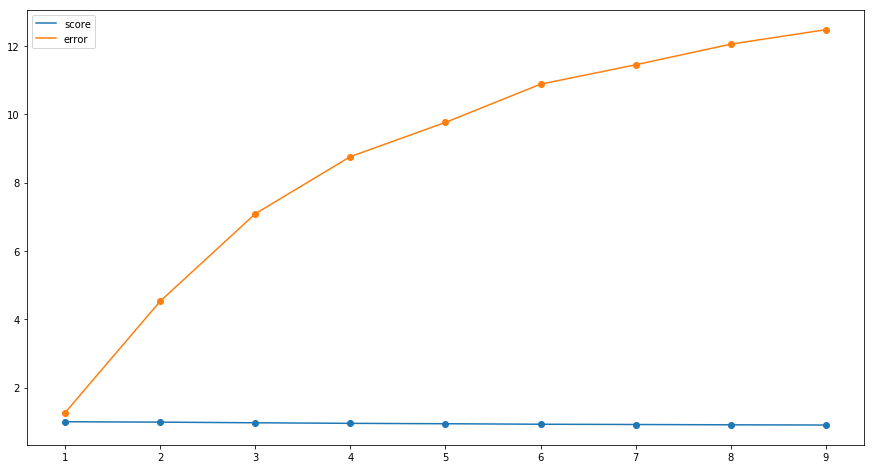

In [12]:
#min_samples_leaf
train_error = []
train_score = []
l1 = []
a=0
for i in range(1,10):
    a = i
    l1.append(a)
    regressor = DecisionTreeRegressor(random_state=0, max_depth=16, min_samples_split = 2, min_samples_leaf = a, max_features = 'auto').fit(X,y)
    train_score.append(regressor.score(X, y))
    train_error.append(sqrt(mean_squared_error(y, regressor.predict(X)))*100)

plt.plot(l1, train_score, label='score')
plt.plot(l1, train_score, 'C0o')
plt.plot(l1, train_error, label='error')
plt.plot(l1, train_error, 'C1o')
plt.legend()
plt.plot()

[]

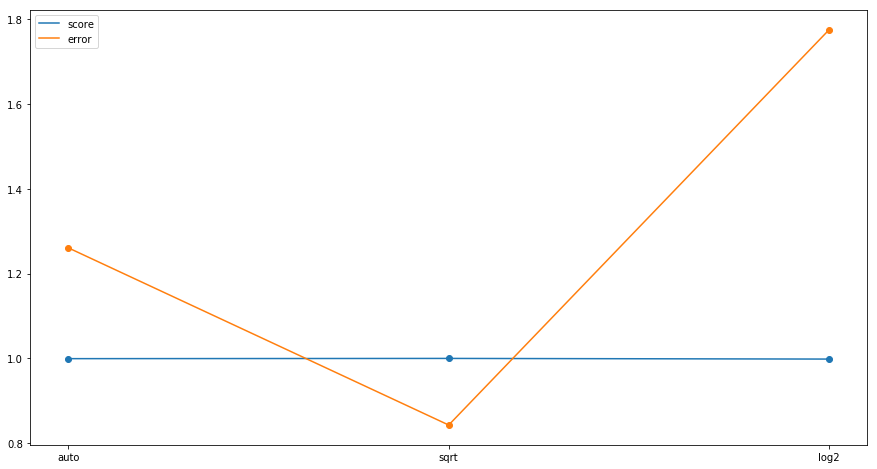

In [13]:
#max_features
train_error = []
train_score = []
l1 = []
a=0
l1.append('auto')
regressor = DecisionTreeRegressor(random_state=0, max_depth=16, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto').fit(X,y)
train_score.append(regressor.score(X, y))
train_error.append(sqrt(mean_squared_error(y, regressor.predict(X)))*100)
l1.append('sqrt')
regressor = DecisionTreeRegressor(random_state=0, max_depth=16, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt').fit(X,y)
train_score.append(regressor.score(X, y))
train_error.append(sqrt(mean_squared_error(y, regressor.predict(X)))*100)
l1.append('log2')
regressor = DecisionTreeRegressor(random_state=0, max_depth=16, min_samples_split = 2, min_samples_leaf = 1, max_features = 'log2').fit(X,y)
train_score.append(regressor.score(X, y))
train_error.append(sqrt(mean_squared_error(y, regressor.predict(X)))*100)

plt.plot(l1, train_score, label='score')
plt.plot(l1, train_score, 'C0o')
plt.plot(l1, train_error, label='error')
plt.plot(l1, train_error, 'C1o')
plt.legend()
plt.plot()

In [14]:
#min_weight_fraction_leaf

regressor = DecisionTreeRegressor(random_state=0, max_depth=16, min_weight_fraction_leaf=0.0, max_features = 'sqrt').fit(X,y)
print(f"SCORE: {regressor.score(X, y)}, RMSE: {sqrt(mean_squared_error(y, regressor.predict(X)))}")

regressor = DecisionTreeRegressor(random_state=0, max_depth=16, min_weight_fraction_leaf=0.5, max_features = 'sqrt').fit(X,y)
print(f"SCORE: {regressor.score(X, y)}, RMSE: {sqrt(mean_squared_error(y, regressor.predict(X)))}")

SCORE: 0.9995550368391702, RMSE: 0.008423211450608661
SCORE: 0.0, RMSE: 0.39931504624370256


[]

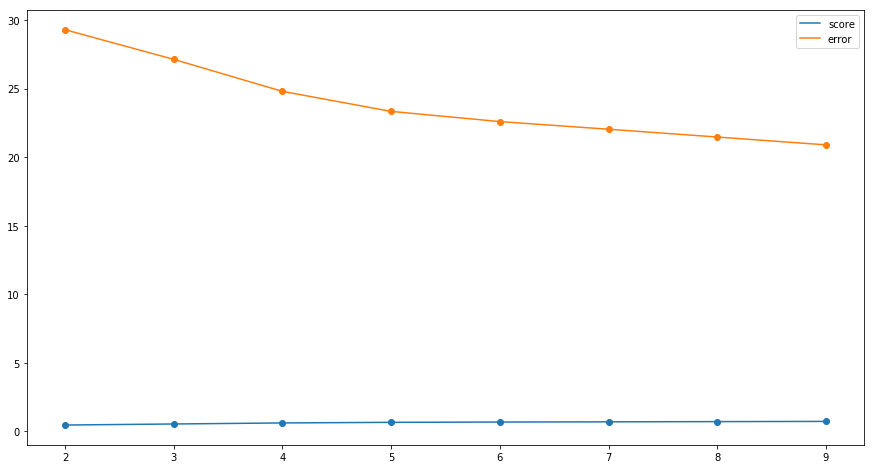

In [15]:
#max_leaf_nodes
train_error = []
train_score = []
l1 = []
a=0
for i in range(2,10):
    a = i
    l1.append(a)
    regressor = DecisionTreeRegressor(random_state=0, max_depth=16, max_leaf_nodes = a).fit(X,y)
    train_score.append(regressor.score(X, y))
    train_error.append(sqrt(mean_squared_error(y, regressor.predict(X)))*100)

plt.plot(l1, train_score, label='score')
plt.plot(l1, train_score, 'C0o')
plt.plot(l1, train_error, label='error')
plt.plot(l1, train_error, 'C1o')
plt.legend()
plt.plot()

In [16]:
#Resultado Final
regressor = DecisionTreeRegressor(random_state=0, max_depth=16, max_features = 'sqrt').fit(X,y)
print(cross_val_score(regressor, X, y, cv=5))
print(f"SCORE: {regressor.score(X, y)}, RMSE: {sqrt(mean_squared_error(y, regressor.predict(X)))}")

[0.66425446 0.68110127 0.67725362 0.6290079  0.59192733]
SCORE: 0.9995550368391702, RMSE: 0.008423211450608661


<h1>Terceira Parte</h1>

[]

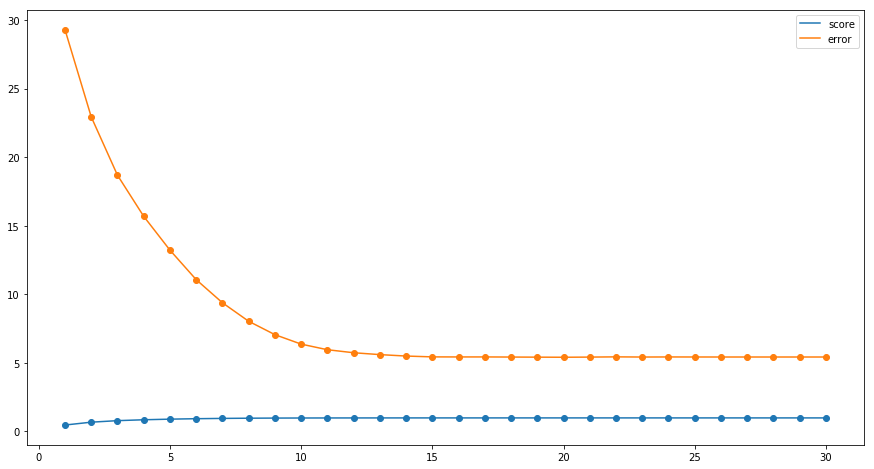

In [17]:
#RandomForestRegressor

#max_depth
train_error = []
train_score = []
l1 = []
a=0
for i in range(30):
    a = i+1
    l1.append(a)
    forest = RandomForestRegressor(random_state=0, max_depth=a, n_estimators = 100).fit(X,y)
    train_score.append(forest.score(X, y))
    train_error.append(sqrt(mean_squared_error(y, forest.predict(X)))*100)

plt.plot(l1, train_score, label='score')
plt.plot(l1, train_score, 'C0o')
plt.plot(l1, train_error, label='error')
plt.plot(l1, train_error, 'C1o')
plt.legend()
plt.plot()

[]

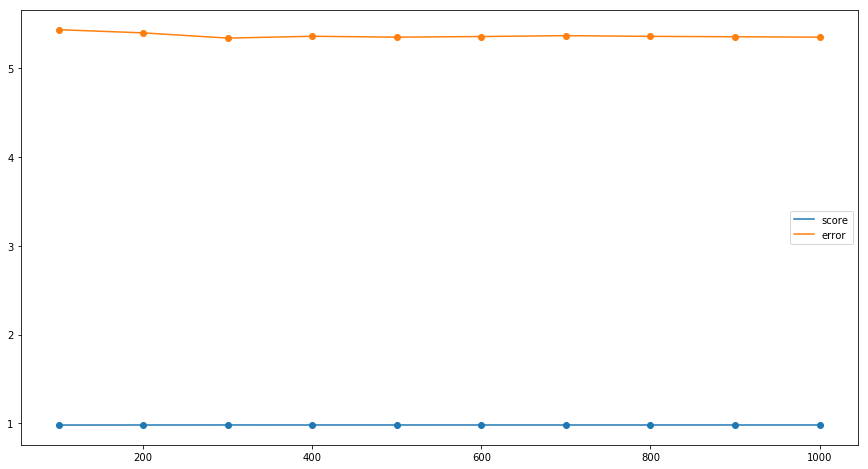

In [18]:
#n_estimators
train_error = []
train_score = []
l1 = []
a=0
for i in range(10):
    a = (i+1)*100
    l1.append(a)
    forest = RandomForestRegressor(random_state=0, max_depth=15, n_estimators = a).fit(X,y)
    train_score.append(forest.score(X, y))
    train_error.append(sqrt(mean_squared_error(y, forest.predict(X)))*100)

plt.plot(l1, train_score, label='score')
plt.plot(l1, train_score, 'C0o')
plt.plot(l1, train_error, label='error')
plt.plot(l1, train_error, 'C1o')
plt.legend()
plt.plot()

[]

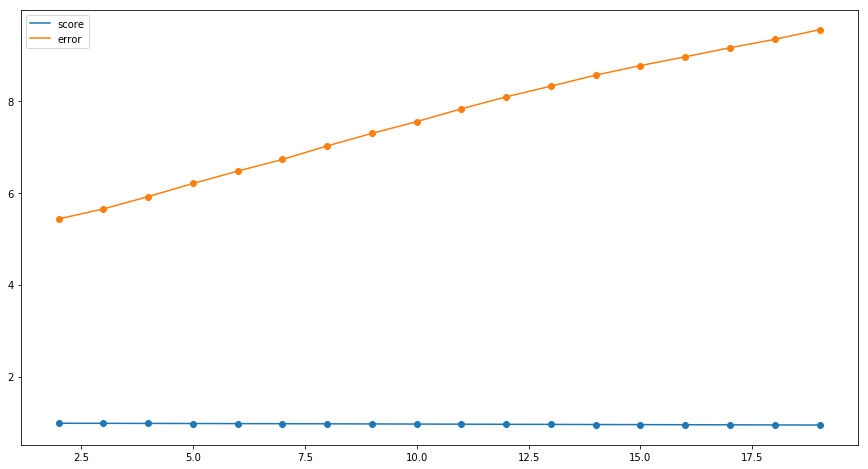

In [19]:
#min_samples_split
train_error = []
train_score = []
l1 = []
a=0
for i in range(2,20):
    a = i
    l1.append(a)
    forest = RandomForestRegressor(random_state=0, max_depth=15, n_estimators=100, min_samples_split = a).fit(X,y)
    train_score.append(forest.score(X, y))
    train_error.append(sqrt(mean_squared_error(y, forest.predict(X)))*100)

plt.plot(l1, train_score, label='score')
plt.plot(l1, train_score, 'C0o')
plt.plot(l1, train_error, label='error')
plt.plot(l1, train_error, 'C1o')
plt.legend()
plt.plot()

[]

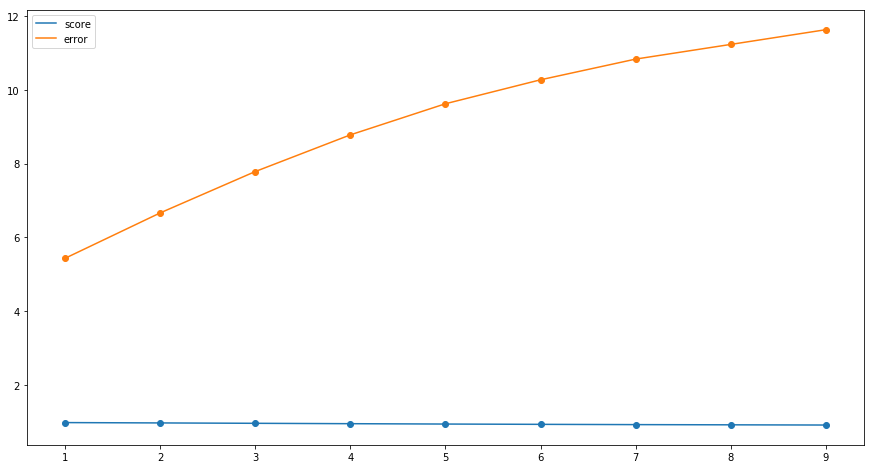

In [20]:
#min_samples_leaf
train_error = []
train_score = []
l1 = []
a=0
for i in range(1,10):
    a = i
    l1.append(a)
    forest = RandomForestRegressor(random_state=0, max_depth=15, n_estimators=100, min_samples_leaf = a).fit(X,y)
    train_score.append(forest.score(X, y))
    train_error.append(sqrt(mean_squared_error(y, forest.predict(X)))*100)

plt.plot(l1, train_score, label='score')
plt.plot(l1, train_score, 'C0o')
plt.plot(l1, train_error, label='error')
plt.plot(l1, train_error, 'C1o')
plt.legend()
plt.plot()

[]

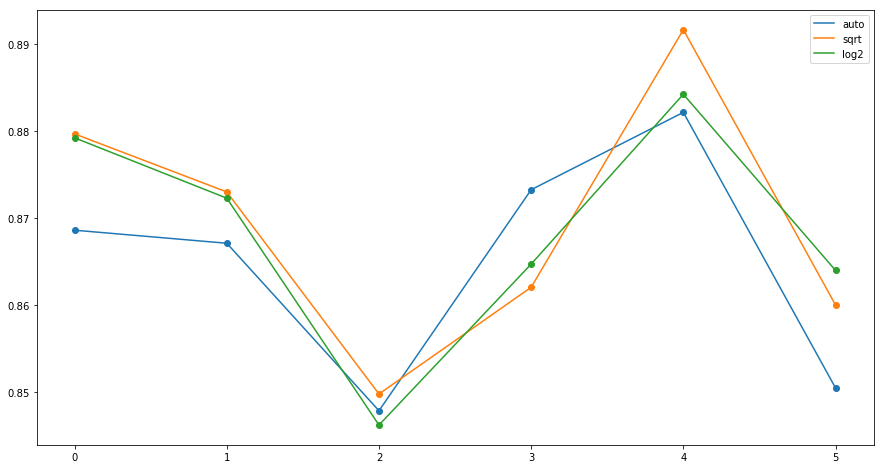

In [21]:
#max_features
train_error = []
train_score = []
l1 = []
a=0
l1.append('auto')
forest = RandomForestRegressor(random_state=0, max_depth=15, min_samples_split = 2, n_estimators=100, max_features = 'auto').fit(X,y)
train_score.append(forest.score(X, y))
train_error.append(sqrt(mean_squared_error(y, forest.predict(X)))*100)
plt.plot(cross_val_score(forest, X, y, cv=6), label='auto')
plt.plot(cross_val_score(forest, X, y, cv=6), 'C0o')

l1.append('sqrt')
forest = RandomForestRegressor(random_state=0, max_depth=15, min_samples_split = 2, n_estimators=100, max_features = 'sqrt').fit(X,y)
train_score.append(forest.score(X, y))
train_error.append(sqrt(mean_squared_error(y, forest.predict(X)))*100)
plt.plot(cross_val_score(forest, X, y, cv=6), label='sqrt')
plt.plot(cross_val_score(forest, X, y, cv=6), 'C1o')

l1.append('log2')
forest = RandomForestRegressor(random_state=0, max_depth=15, min_samples_split = 2, n_estimators=100, max_features = 'log2').fit(X,y)
train_score.append(forest.score(X, y))
train_error.append(sqrt(mean_squared_error(y, forest.predict(X)))*100)
plt.plot(cross_val_score(forest, X, y, cv=6), label='log2')
plt.plot(cross_val_score(forest, X, y, cv=6), 'C2o')


plt.legend()
plt.plot()

[]

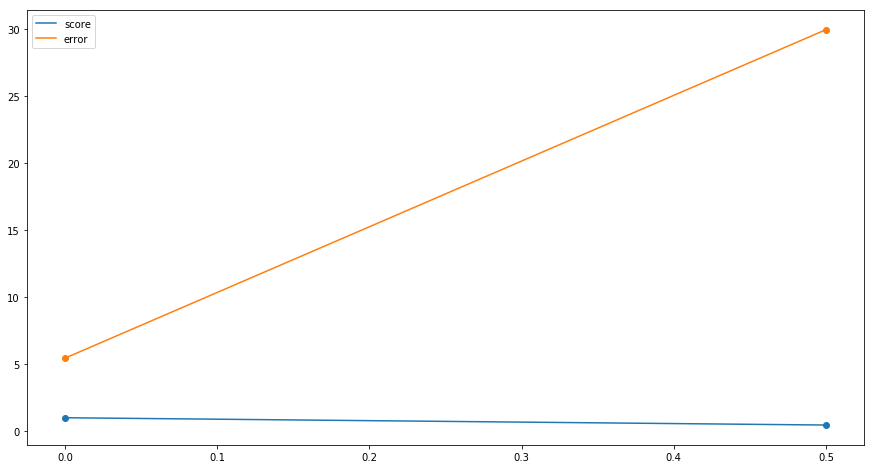

In [22]:
#min_weight_fraction_leaf
train_error = []
train_score = []
l1 = []
a=0
for i in range(2):
    a = i*0.5
    l1.append(a)
    forest = RandomForestRegressor(random_state=0, max_depth=15, min_weight_fraction_leaf = a,  n_estimators=100).fit(X,y)
    train_score.append(forest.score(X, y))
    train_error.append(sqrt(mean_squared_error(y, forest.predict(X)))*100)

plt.plot(l1, train_score, label='score')
plt.plot(l1, train_score, 'C0o')
plt.plot(l1, train_error, label='error')
plt.plot(l1, train_error, 'C1o')
plt.legend()
plt.plot()

[]

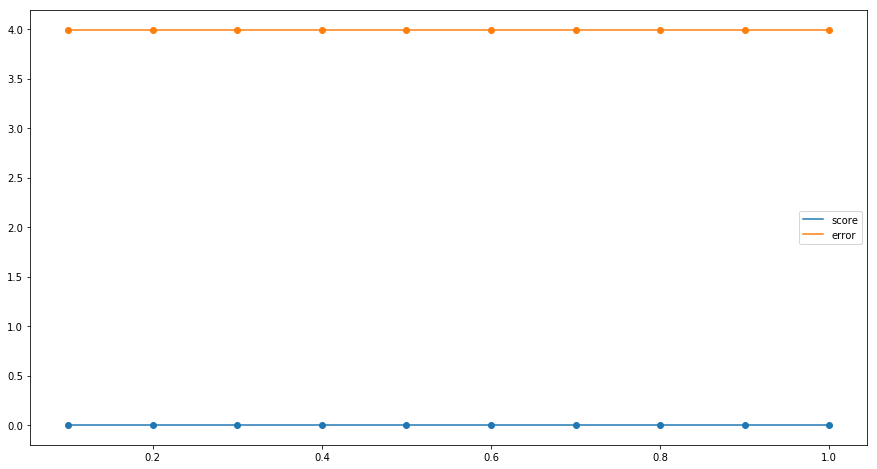

In [23]:
#min_impurity_decrease
train_error = []
train_score = []
l1 = []
a=0
for i in range(10):
    a = (i+1)/10
    l1.append(a)
    forest = RandomForestRegressor(random_state=0, max_depth=15, min_impurity_decrease = a,  n_estimators=100).fit(X,y)
    train_score.append(forest.score(X, y))
    train_error.append(sqrt(mean_squared_error(y, forest.predict(X)))*10)

plt.plot(l1, train_score, label='score')
plt.plot(l1, train_score, 'C0o')
plt.plot(l1, train_error, label='error')
plt.plot(l1, train_error, 'C1o')
plt.legend()
plt.plot()

[]

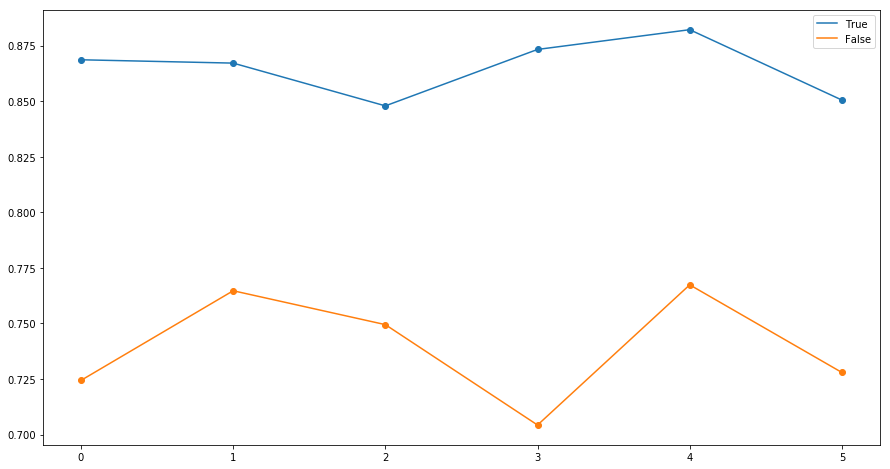

In [24]:
#bootstrap
train_error = []
train_score = []
l1 = []
a=0
l1.append('True')
forest = RandomForestRegressor(random_state=0, max_depth=15, min_samples_split = 2, n_estimators=100, bootstrap = True).fit(X,y)
train_score.append(forest.score(X, y))
train_error.append(sqrt(mean_squared_error(y, forest.predict(X)))*100)
plt.plot(cross_val_score(forest, X, y, cv=6), label='True')
plt.plot(cross_val_score(forest, X, y, cv=6), 'C0o')

l1.append('False')
forest = RandomForestRegressor(random_state=0, max_depth=15, min_samples_split = 2, n_estimators=100, bootstrap = False).fit(X,y)
train_score.append(forest.score(X, y))
train_error.append(sqrt(mean_squared_error(y, forest.predict(X)))*100)


plt.plot(cross_val_score(forest, X, y, cv=6), label='False')
plt.plot(cross_val_score(forest, X, y, cv=6), 'C1o')

plt.legend()
plt.plot()

In [34]:
#Resultado Final
forest = RandomForestRegressor(random_state=0, max_depth=15, min_samples_split = 2, n_estimators=100, max_features = 'sqrt').fit(X,y)
pred = forest.predict(X)
print(cross_val_score(forest, X, y, cv=6))
print(f"SCORE: {forest.score(X, y)}, RMSE: {sqrt(mean_squared_error(y, pred))}")

[0.87970684 0.87303847 0.84982635 0.86208791 0.89167978 0.86005585]
SCORE: 0.9813027201559567, RMSE: 0.05460153962521747


In [43]:
#lendo o dataset
dtf = pd.read_csv('test.csv')

# Separando as colunas numéricas
columnst = [o for o in dt.describe().columns]
#columnst.remove('Id')
# Removendo os dados inválidos
dt = dtf.fillna(dtf.mean())
dt = dt[columnst]
dt = dt.apply (pd.to_numeric, errors='coerce')
dt = dt.dropna()
dt.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,20.561228,4955.517327,1.436812,1.113740,30.390071,21.130467,176.709824,455.111888,176.693301,...,216.974165,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.580357,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,351.000000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,78.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,752.000000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [44]:
predt = forest.predict(dt)

In [45]:
# Save test predictions to file
output = pd.DataFrame({'Id': dtf.Id,
                       'SalePrice': predt})
output.to_csv('submission.csv', index=False)